In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("quiz_03.ipynb")

# Quiz 3

## Instructions


1. After you answer a question, you should run its public tests.
1. After you answer every question, you should:
    1. Restart your kernel and clear all output
    1. Run up to the last cell
    1. Save your notebook
    1. Run the last cell to create a .zip file for Gradescope
    1. Upload this .zip file to Gradescope
    1. ***Make sure your local autograder results match your Gradescope autograder results***
1. This quiz has public and hidden tests:
    1. Public tests check your answers for correct types and shapes but may not completely check your answers
    1. Hidden tests completely check your answers but will not be available until after the due date
    1. *If all tests were public, you could quickly reverse-engineer incorrect answers that trick the autograder*
1. You may ask technical questions on Canvas Discussions, but this quiz is an individual effort.

## Packages and Settings

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data

I used the following code to download and save the raw data you need for this quiz.
***You should review the following code but not run it.***

In [ ]:
# import yfinance as yf
# import pandas_datareader as pdr

# # download daily data for AAPL, remove timezone from date index, and save to CSV
# (
#     yf.Ticker(ticker='AAPL')
#     .history(period='max', auto_adjust=False)
#     .assign(Date = lambda x: x.index.tz_localize(None))
#     .set_index('Date')
#     .loc[:'2023-01']
#     .to_csv('aapl.csv')
# )

# # download daily factors and save to CSV
# (
#     pdr.DataReader(
#         name='F-F_Research_Data_Factors_daily',
#         data_source='famafrench',
#         start='1900'
#     )
#     [0]
#     .to_csv('ff.csv')
# )

I used the following code to load the raw data you need for this quiz.
***Run the following code as-is (i.e., do not change it).***

In [3]:
aapl = pd.read_csv('aapl.csv', index_col='Date', parse_dates=True)

In [4]:
ff = pd.read_csv('ff.csv', index_col='Date', parse_dates=True)

## Questions

### Question 1

Calculate the decimal daily returns for AAPL and add them to the data frame `aapl` as column `Returns`.

_Points:_ 20

In [5]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600,0.0,0.0


In [6]:
aapl["Returns"] = aapl["Adj Close"].pct_change()

In [7]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 1 message: aapl has the expected columns (+10 pts)
q1 - 2 message: aapl has the expected column sums (+10 pts)

### Question 2

Calculate the Sharpe Ratio for AAPL from October 2011 through October 2019 (inclusive) and assign it to float variable `sr`.
Use the risk-free rate of return as your benchmark.

***Note: This question has 3 hidden tests worth 30 points.***

_Points:_ 50

In [21]:
excess_ret = aapl["Returns"].mul(100).sub(ff["RF"]).dropna()
sr = np.sqrt(252) * excess_ret.mean() / excess_ret.std()

In [18]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 1 message: sr is a float variable (+10 pts)
q2 - 2 message: sr is positive (+10 pts)

### Question 3

<!-- BEGIN QUESTION -->

Plot the cumulative returns for AAPL from January 2000 through January 2023 (inclusive).
Plot these cumulative returns as percents instead of decimals, and clearly label the plot.

***Note: This question is manually graded, so there are no public or hidden tests.***

_Points:_ 30

In [39]:
import matplotlib.dates as mdates

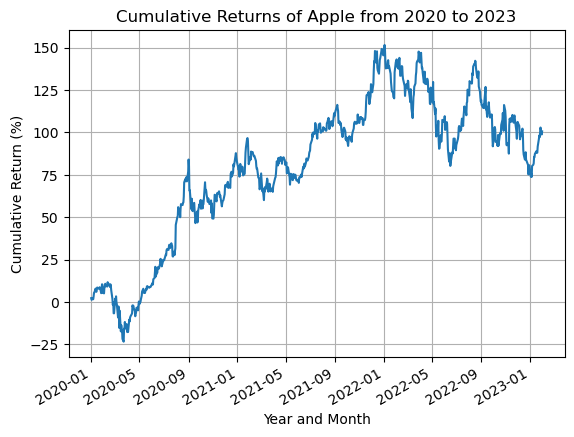

In [50]:
returns_20_23 = aapl.loc["01-2020":"01-2023"]["Returns"]
cum_returns = returns_20_23.add(1).cumprod().sub(1).mul(100)
cum_returns.plot()
plt.ylabel('Cumulative Return (%)')
plt.xlabel('Year and Month')
plt.grid()
plt.title(f'Cumulative Returns of Apple from {cum_returns.index[0]:%Y} to {cum_returns.index[-1]:%Y}')
plt.show()

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)